## 필요한 라이브러리

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import keras

from keras import models
from keras import layers

Using TensorFlow backend.


In [2]:
IMG_SIZE = 150

## ImageDataGenerator로 데이터 배열 생성

In [3]:
from keras.preprocessing.image import ImageDataGenerator

In [4]:
## 훈련 데이터 증식
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,)

val_datagen = ImageDataGenerator(rescale=1./255)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    'dataset/train',
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=20,
    class_mode='binary')

val_generator = val_datagen.flow_from_directory(
    'dataset/val',
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=20,
    class_mode='binary')

test_generator = test_datagen.flow_from_directory(
    'dataset/test',
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=20,
    class_mode='binary')

Found 1100 images belonging to 2 classes.
Found 200 images belonging to 2 classes.
Found 200 images belonging to 2 classes.


## Create Model1

In [30]:
from keras import regularizers # l2규제 사용
from keras.optimizers import Adam

model = models.Sequential()

model.add(layers.Conv2D(64, (3, 3), activation='relu',
                       input_shape=(IMG_SIZE, IMG_SIZE, 3)))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(256, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Flatten())

model.add(layers.Dropout(0.5)) # 드롭아웃

model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer=Adam(lr=0.001, beta_1=0.9, beta_2=0.999),
             loss='binary_crossentropy',
             metrics=['accuracy'])

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_24 (Conv2D)           (None, 198, 198, 64)      1792      
_________________________________________________________________
max_pooling2d_24 (MaxPooling (None, 99, 99, 64)        0         
_________________________________________________________________
conv2d_25 (Conv2D)           (None, 97, 97, 128)       73856     
_________________________________________________________________
max_pooling2d_25 (MaxPooling (None, 48, 48, 128)       0         
_________________________________________________________________
dropout_13 (Dropout)         (None, 48, 48, 128)       0         
_________________________________________________________________
flatten_10 (Flatten)         (None, 294912)            0         
_________________________________________________________________
dense_19 (Dense)             (None, 128)               37748864  
__________

## Create Model2

In [9]:
from keras import models
from keras import layers
from keras import optimizers

model = models.Sequential()

model.add(layers.Conv2D(64, (3, 3), activation='relu',
                       input_shape=(IMG_SIZE, IMG_SIZE, 3)))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))


model.add(layers.Conv2D(256, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Flatten())

model.add(layers.Dropout(0.5)) # 드롭아웃

model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
             loss='binary_crossentropy',
             metrics=['accuracy'])

model.summary()






Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 148, 148, 64)      1792      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 74, 74, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 72, 72, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 36, 36, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 34, 34, 256)       295168    
__________________________________________________________

## Create Model3

In [15]:
from keras.applications import VGG16

conv_base = VGG16(weights = 'imagenet',
                 include_top=False,
                 input_shape=(IMG_SIZE, IMG_SIZE, 3))

conv_base.trainable = True

set_trainable = False
for layer in conv_base.layers:
    if layer.name == 'block5_conv1':
        set_trainable = True
    if set_trainable:
        layer.trainable = True
    else:
        layer.trainable = False

In [17]:
from keras import models
from keras import layers
from keras import optimizers
from keras import regularizers

model = models.Sequential()
model.add(conv_base)
model.add(layers.Flatten())

model.add(layers.Dropout(0.5)) # 드롭아웃

model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer=optimizers.Adam(lr=1e-5, beta_1=0.9, beta_2=0.999),
             loss='binary_crossentropy',
             metrics=['accuracy'])

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 4, 4, 512)         14714688  
_________________________________________________________________
flatten_6 (Flatten)          (None, 8192)              0         
_________________________________________________________________
dropout_6 (Dropout)          (None, 8192)              0         
_________________________________________________________________
dense_15 (Dense)             (None, 512)               4194816   
_________________________________________________________________
dense_16 (Dense)             (None, 256)               131328    
_________________________________________________________________
dense_17 (Dense)             (None, 1)                 257       
Total params: 19,041,089
Trainable params: 11,405,825
Non-trainable params: 7,635,264
________________________________________________________

## Create Model4

In [7]:
from keras.applications import VGG16

conv_base = VGG16(weights = 'imagenet',
                 include_top=False,
                 input_shape=(IMG_SIZE, IMG_SIZE, 3))

conv_base.trainable = True

set_trainable = False
for layer in conv_base.layers:
    if layer.name == 'block5_conv1':
        set_trainable = True
    if set_trainable:
        layer.trainable = True
    else:
        layer.trainable = False

In [8]:
from keras import models
from keras import layers
from keras import optimizers
from keras import regularizers

model = models.Sequential()
model.add(conv_base)
model.add(layers.Flatten())

model.add(layers.Dropout(0.5)) # 드롭아웃

model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer=optimizers.RMSprop(lr=1e-5),
             loss='binary_crossentropy',
             metrics=['accuracy'])

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 4, 4, 512)         14714688  
_________________________________________________________________
flatten_1 (Flatten)          (None, 8192)              0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 8192)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 512)               4194816   
_________________________________________________________________
dense_2 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 257       
Total params: 19,041,089
Trainable params: 17,305,601
Non-trainable params: 1,735,488
________________________________________________________

## Create Model5

In [5]:
from keras.applications import Xception

conv_base = Xception(weights = 'imagenet',
                 include_top=False,
                 input_shape=(IMG_SIZE, IMG_SIZE, 3))

conv_base.trainable = True
'''
set_trainable = False
for layer in conv_base.layers:
    if layer.name == 'block13_sepconv1':
        set_trainable = True
    if set_trainable:
        layer.trainable = True
    else:
        layer.trainable = False
'''

"\nset_trainable = False\nfor layer in conv_base.layers:\n    if layer.name == 'block13_sepconv1':\n        set_trainable = True\n    if set_trainable:\n        layer.trainable = True\n    else:\n        layer.trainable = False\n"

In [6]:
from keras import models
from keras import layers
from keras import optimizers

model = models.Sequential()
model.add(conv_base)
model.add(layers.Flatten())

model.add(layers.Dropout(0.5)) # 드롭아웃

model.add(layers.Dense(512, activation='relu'))

model.add(layers.Dropout(0.5)) # 드롭아웃

model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer=optimizers.RMSprop(lr=1e-5),
             loss='binary_crossentropy',
             metrics=['accuracy'])

model.summary()

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
xception (Model)             (None, 5, 5, 2048)        20861480  
_________________________________________________________________
flatten_1 (Flatten)          (None, 51200)             0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 51200)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 512)               26214912  
_________________________________________________________________
dropout_2 (Dropout)          (None, 512)               0         
_______________________________________________________________

## Create Model6

In [16]:
from keras.applications import InceptionV3

conv_base = InceptionV3(weights = 'imagenet',
                 include_top=False,
                 input_shape=(IMG_SIZE, IMG_SIZE, 3))

conv_base.trainable = True
'''
set_trainable = False
for layer in conv_base.layers:
    if layer.name == 'block5_conv1':
        set_trainable = True
    if set_trainable:
        layer.trainable = True
    else:
        layer.trainable = False
'''

"\nset_trainable = False\nfor layer in conv_base.layers:\n    if layer.name == 'block5_conv1':\n        set_trainable = True\n    if set_trainable:\n        layer.trainable = True\n    else:\n        layer.trainable = False\n"

In [17]:
from keras import models
from keras import layers
from keras import optimizers

model = models.Sequential()
model.add(conv_base)
model.add(layers.Flatten())

model.add(layers.Dropout(0.5)) # 드롭아웃

model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer=optimizers.RMSprop(lr=1e-5),
             loss='binary_crossentropy',
             metrics=['accuracy'])

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inception_v3 (Model)         (None, 3, 3, 2048)        21802784  
_________________________________________________________________
flatten_4 (Flatten)          (None, 18432)             0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 18432)             0         
_________________________________________________________________
dense_7 (Dense)              (None, 512)               9437696   
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 513       
Total params: 31,240,993
Trainable params: 31,206,561
Non-trainable params: 34,432
_________________________________________________________________


## Create Model7

In [42]:
from keras.applications import DenseNet169

conv_base = InceptionV3(weights = 'imagenet',
                 include_top=False,
                 input_shape=(IMG_SIZE, IMG_SIZE, 3))

conv_base.trainable = False


set_trainable = False
for layer in conv_base.layers:
    if layer.name == 'conv5_block15_0_bn':
        set_trainable = True
    if set_trainable:
        layer.trainable = True
    else:
        layer.trainable = False


In [43]:
from keras import models
from keras import layers
from keras import optimizers

model = models.Sequential()
model.add(conv_base)
model.add(layers.Flatten())

model.add(layers.Dropout(0.5)) # 드롭아웃

model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer=optimizers.RMSprop(lr=1e-5),
             loss='binary_crossentropy',
             metrics=['accuracy'])

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inception_v3 (Model)         (None, 3, 3, 2048)        21802784  
_________________________________________________________________
flatten_11 (Flatten)         (None, 18432)             0         
_________________________________________________________________
dropout_11 (Dropout)         (None, 18432)             0         
_________________________________________________________________
dense_21 (Dense)             (None, 512)               9437696   
_________________________________________________________________
dense_22 (Dense)             (None, 1)                 513       
Total params: 31,240,993
Trainable params: 9,438,209
Non-trainable params: 21,802,784
_________________________________________________________________


## Create Model8

In [20]:
from keras.applications import InceptionResNetV2

conv_base = InceptionResNetV2(weights = 'imagenet',
                 include_top=False,
                 input_shape=(IMG_SIZE, IMG_SIZE, 3))

conv_base.trainable = True

'''
set_trainable = False
for layer in conv_base.layers:
    if layer.name == 'block8_1_mixed':
        set_trainable = True
    if set_trainable:
        layer.trainable = True
    else:
        layer.trainable = False
'''

"\nset_trainable = False\nfor layer in conv_base.layers:\n    if layer.name == 'block8_1_mixed':\n        set_trainable = True\n    if set_trainable:\n        layer.trainable = True\n    else:\n        layer.trainable = False\n"

In [21]:
from keras import models
from keras import layers
from keras import optimizers

model = models.Sequential()
model.add(conv_base)
model.add(layers.Flatten())

model.add(layers.Dropout(0.5)) # 드롭아웃

model.add(layers.Dense(512, activation='relu'))

model.add(layers.Dropout(0.5)) # 드롭아웃

model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer=optimizers.RMSprop(lr=1e-5),
             loss='binary_crossentropy',
             metrics=['accuracy'])

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inception_resnet_v2 (Model)  (None, 3, 3, 1536)        54336736  
_________________________________________________________________
flatten_3 (Flatten)          (None, 13824)             0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 13824)             0         
_________________________________________________________________
dense_5 (Dense)              (None, 512)               7078400   
_________________________________________________________________
dropout_6 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 513       
Total params: 61,415,649
Trainable params: 61,355,105
Non-trainable params: 60,544
___________________________________________________________

## Create Model9

In [5]:
from keras.applications import NASNetLarge

conv_base = NASNetLarge(weights = 'imagenet',
                 include_top=False,
                 input_shape=(IMG_SIZE, IMG_SIZE, 3))

conv_base.trainable = True

'''
set_trainable = False
for layer in conv_base.layers:
    if layer.name == 'block8_1_mixed':
        set_trainable = True
    if set_trainable:
        layer.trainable = True
    else:
        layer.trainable = False
'''

"\nset_trainable = False\nfor layer in conv_base.layers:\n    if layer.name == 'block8_1_mixed':\n        set_trainable = True\n    if set_trainable:\n        layer.trainable = True\n    else:\n        layer.trainable = False\n"

In [6]:
from keras import models
from keras import layers
from keras import optimizers

model = models.Sequential()
model.add(conv_base)
model.add(layers.Flatten())

model.add(layers.Dropout(0.5)) # 드롭아웃

model.add(layers.Dense(512, activation='relu'))

model.add(layers.Dropout(0.5)) # 드롭아웃

model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer=optimizers.RMSprop(lr=1e-5),
             loss='binary_crossentropy',
             metrics=['accuracy'])

model.summary()

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
NASNet (Model)               (None, 11, 11, 4032)      84916818  
_________________________________________________________________
flatten_1 (Flatten)          (None, 487872)            0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 487872)            0         
_________________________________________________________________
dense_1 (Dense)              (None, 512)               249790976 
_________________________________________________________________
dropout_2 (Dropout)          (None, 512)               0         
_______________________________________________________________

## fit_generator로 모델 훈련하기

In [ ]:
history = model.fit_generator(
    train_generator,
    steps_per_epoch=55,
    epochs=2,
    validation_data=val_generator,
    validation_steps=10)

Epoch 1/2
55/55 [==============================] - 121s 2s/step - loss: 0.7187 - acc: 0.5164 - val_loss: 0.6162 - val_acc: 0.5650
Epoch 2/2
52/55 [===========================>..] - ETA: 6s - loss: 0.6927 - acc: 0.5365

## * Model Save

In [33]:
model.save('VGG16_tuning_Model20.h5') # 가중치, 아키텍처, 옵티마이저 한 번에 저장
# VGG16_json = model.to_json() # 모델의 아키텍처만 저장하고 가중치는 저장하지 않는다.
# model.save_weights('VGG16_tuning_only_W.h5') # 가중치만 저장

## * History 저장

In [34]:
import pandas as pd

hist_df = pd.DataFrame(history.history)

hist_json_file = 'history_m20.json'
with open(hist_json_file, mode='w') as f:
    hist_df.to_json(f)
    
hist_csv_file = 'history_m20.csv'
with open(hist_csv_file, mode='w') as f:
    hist_df.to_csv(f)

## evaluate_generator로 평가하기

In [32]:
model.evaluate_generator(test_generator, steps=10)

[0.14697329923510552, 0.9699999928474426]

In [8]:
from keras.models import load_model
L_model = load_model('VGG16_tuning_Model2.h5')

L_model.evaluate_generator(test_generator, steps=10)

[0.16985820457339287, 0.949999988079071]

In [6]:
from keras.models import load_model
L_model = load_model('VGG16_tuning_Model1.h5')

L_model.predict_generator(test_generator, steps=10)

array([[0.05483338],
       [0.9470879 ],
       [0.07096884],
       [0.7409761 ],
       [0.8940597 ],
       [0.9139156 ],
       [0.11048761],
       [0.895054  ],
       [0.01699969],
       [0.04096881],
       [0.05413198],
       [0.81660604],
       [0.13386312],
       [0.05245319],
       [0.94169414],
       [0.02867612],
       [0.95735204],
       [0.08964905],
       [0.07625055],
       [0.8665266 ],
       [0.40557742],
       [0.02404156],
       [0.8154608 ],
       [0.9490812 ],
       [0.07033297],
       [0.8805924 ],
       [0.02472076],
       [0.9311236 ],
       [0.9792448 ],
       [0.08398989],
       [0.9272183 ],
       [0.31522518],
       [0.18982482],
       [0.10160875],
       [0.77405953],
       [0.9563288 ],
       [0.0468578 ],
       [0.837193  ],
       [0.7651423 ],
       [0.8821832 ],
       [0.9786879 ],
       [0.0874404 ],
       [0.7423436 ],
       [0.9127288 ],
       [0.1155234 ],
       [0.54068613],
       [0.10776576],
       [0.588

## predict_generator로 예측하기

In [46]:
output = model.predict_generator(test_generator, steps=10)
print(test_generator.class_indices)
print(output)

{'G': 0, 'N': 1}
[[0.88173276]
 [0.8570299 ]
 [0.8752361 ]
 [0.7862941 ]
 [0.89524114]
 [0.24058741]
 [0.8940597 ]
 [0.04343015]
 [0.77405953]
 [0.0392808 ]
 [0.718391  ]
 [0.87507594]
 [0.8525238 ]
 [0.9261135 ]
 [0.9367264 ]
 [0.10776576]
 [0.12709883]
 [0.04260722]
 [0.61887413]
 [0.01398718]
 [0.5887113 ]
 [0.54068613]
 [0.11048761]
 [0.11143577]
 [0.5106519 ]
 [0.7409761 ]
 [0.38491845]
 [0.1011647 ]
 [0.93644106]
 [0.02489284]
 [0.01699969]
 [0.13169473]
 [0.7651424 ]
 [0.9190981 ]
 [0.95735204]
 [0.10160875]
 [0.94148386]
 [0.895054  ]
 [0.48280078]
 [0.05245319]
 [0.08168983]
 [0.04962936]
 [0.9329947 ]
 [0.8821833 ]
 [0.8781405 ]
 [0.07934296]
 [0.3665721 ]
 [0.04842615]
 [0.74526364]
 [0.164377  ]
 [0.81660604]
 [0.6602985 ]
 [0.8986835 ]
 [0.9470879 ]
 [0.05973539]
 [0.90299803]
 [0.85842836]
 [0.13386312]
 [0.8485998 ]
 [0.2560207 ]
 [0.7684109 ]
 [0.75708365]
 [0.9244102 ]
 [0.9671327 ]
 [0.04280505]
 [0.8294022 ]
 [0.9416979 ]
 [0.15306622]
 [0.01848647]
 [0.02251911]
 [0

In [70]:
from keras.models import load_model
L_model = load_model('VGG16_tuning_test.h5')

output = L_model.predict_generator(test_generator, steps=10)
print(test_generator.class_indices)
print(output)

{'G': 0, 'N': 1}
[[0.14836735]
 [0.89000154]
 [0.17670736]
 [0.15469354]
 [0.4008406 ]
 [0.8268138 ]
 [0.78324443]
 [0.875579  ]
 [0.10392979]
 [0.86603963]
 [0.8574656 ]
 [0.18351701]
 [0.05549917]
 [0.26115933]
 [0.39049956]
 [0.89782   ]
 [0.91016245]
 [0.37024516]
 [0.94048655]
 [0.8103199 ]
 [0.7428974 ]
 [0.67504543]
 [0.18309331]
 [0.94453   ]
 [0.17850882]
 [0.5251325 ]
 [0.10941082]
 [0.15084153]
 [0.31313837]
 [0.8144188 ]
 [0.31102377]
 [0.08187002]
 [0.8322671 ]
 [0.7582938 ]
 [0.94440776]
 [0.25840887]
 [0.10604498]
 [0.10987872]
 [0.92000127]
 [0.7107945 ]
 [0.17851621]
 [0.15481362]
 [0.2283119 ]
 [0.09197944]
 [0.12088618]
 [0.82689166]
 [0.56147486]
 [0.9036262 ]
 [0.22660649]
 [0.87938654]
 [0.68093145]
 [0.9266    ]
 [0.11307755]
 [0.7444793 ]
 [0.29133815]
 [0.89320886]
 [0.11525708]
 [0.82462156]
 [0.8897668 ]
 [0.8060256 ]
 [0.48645568]
 [0.12643874]
 [0.30694982]
 [0.7285316 ]
 [0.74476856]
 [0.8761961 ]
 [0.05345067]
 [0.49556544]
 [0.9048548 ]
 [0.07832789]
 [0

0

## 훈련과 검증 손실 그리기

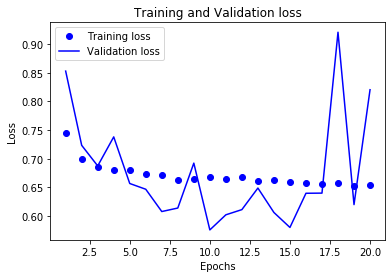

In [10]:
history_dict = history.history
loss = history_dict['loss'] # 훈련 손실
val_loss = history_dict['val_loss'] # 검증 손실

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

## 훈련과 검증 정확도 그리기

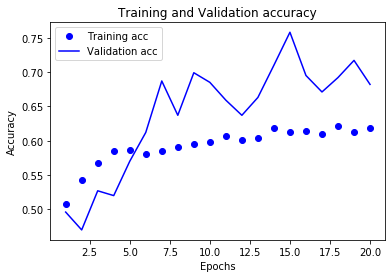

In [11]:
history_dict = history.history
acc = history_dict['acc'] # 훈련 정확도
val_acc = history_dict['val_acc'] # 검증 정확도

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

## Model1 평가 & 예측

In [4]:
from keras.models import load_model
from keras.preprocessing.image import ImageDataGenerator

test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(
    'dataset/test',
    target_size=(150, 150),
    batch_size=1,
    class_mode=None)

model = load_model('VGG16_tuning_Model2.h5')

result = model.predict_generator(test_generator,steps=1)

print(result)

Found 1 images belonging to 2 classes.
[[0.9883846]]


In [11]:
L_model.predict_generator(test_generator, steps=10)

array([[0.02766737],
       [0.9127288 ],
       [0.67796445],
       [0.6895908 ],
       [0.8973963 ],
       [0.05973539],
       [0.8922541 ],
       [0.1064831 ],
       [0.01398718],
       [0.02251911],
       [0.9110558 ],
       [0.91604835],
       [0.9610489 ],
       [0.03951135],
       [0.7414126 ],
       [0.01667896],
       [0.08626211],
       [0.0466089 ],
       [0.8203862 ],
       [0.04260725],
       [0.20009008],
       [0.03759015],
       [0.10160875],
       [0.07033297],
       [0.92018336],
       [0.75708365],
       [0.9438776 ],
       [0.8940597 ],
       [0.04343015],
       [0.07625055],
       [0.10776576],
       [0.08168983],
       [0.8821833 ],
       [0.8294022 ],
       [0.81660604],
       [0.21027091],
       [0.895054  ],
       [0.76006716],
       [0.06585422],
       [0.9320191 ],
       [0.89124966],
       [0.11201504],
       [0.04473072],
       [0.8525238 ],
       [0.13169473],
       [0.03454697],
       [0.0874404 ],
       [0.931

## Model2 평가 & 예측

In [12]:
from keras.models import load_model
L_model = load_model('VGG16_tuning_Model2.h5')

L_model.evaluate_generator(test_generator, steps=10)

[0.15451634377241136, 0.9649999976158142]

In [13]:
L_model.predict_generator(test_generator, steps=10)

array([[8.78104925e-01],
       [1.61838531e-02],
       [2.47288793e-01],
       [9.33233798e-01],
       [9.56236362e-01],
       [4.31167483e-01],
       [5.01805484e-01],
       [9.60378349e-02],
       [9.25183475e-01],
       [8.85594010e-01],
       [9.51242328e-01],
       [7.89903045e-01],
       [6.88768089e-01],
       [2.05145776e-02],
       [9.50965285e-01],
       [6.16227686e-02],
       [5.53131700e-02],
       [2.85260499e-01],
       [2.70988017e-01],
       [8.66115093e-04],
       [7.60915816e-01],
       [2.10465193e-01],
       [8.50739956e-01],
       [8.86313915e-02],
       [7.87803531e-03],
       [9.45715904e-01],
       [5.17315567e-02],
       [6.30429566e-01],
       [8.48233461e-01],
       [9.38172579e-01],
       [5.78579426e-01],
       [9.58628297e-01],
       [3.46672326e-01],
       [8.99651647e-01],
       [9.77737188e-01],
       [8.96659255e-01],
       [4.98776734e-02],
       [8.92696679e-02],
       [9.49256778e-01],
       [8.70626807e-01],


## Model3 평가 & 예측

In [14]:
from keras.models import load_model
L_model = load_model('VGG16_tuning_Model3.h5')

L_model.evaluate_generator(test_generator, steps=10)

[0.18555152416229248, 0.9499999940395355]

In [15]:
L_model.predict_generator(test_generator, steps=10)

array([[0.9498826 ],
       [0.95621276],
       [0.9385375 ],
       [0.01638973],
       [0.03689539],
       [0.00365472],
       [0.87653995],
       [0.65432096],
       [0.07549924],
       [0.86402583],
       [0.00575927],
       [0.03929886],
       [0.01922506],
       [0.2916531 ],
       [0.7614223 ],
       [0.81981206],
       [0.9570358 ],
       [0.5906579 ],
       [0.06220275],
       [0.2742015 ],
       [0.00850621],
       [0.0962733 ],
       [0.8185121 ],
       [0.23171535],
       [0.94503266],
       [0.00423235],
       [0.00480729],
       [0.01096085],
       [0.09767604],
       [0.2764968 ],
       [0.90485215],
       [0.0150722 ],
       [0.78579456],
       [0.00708011],
       [0.01795715],
       [0.9435178 ],
       [0.88631904],
       [0.54905975],
       [0.09931833],
       [0.39769673],
       [0.10100871],
       [0.06503522],
       [0.02508381],
       [0.8364668 ],
       [0.6322325 ],
       [0.81476617],
       [0.48401478],
       [0.004

## Model4 평가 & 예측

In [16]:
from keras.models import load_model
L_model = load_model('VGG16_tuning_Model4.h5')

L_model.evaluate_generator(test_generator, steps=10)

[0.20916560664772987, 0.9199999928474426]

In [17]:
L_model.predict_generator(test_generator, steps=10)

array([[8.85170519e-01],
       [7.38582015e-03],
       [6.24839664e-01],
       [1.42807066e-02],
       [1.28359199e-02],
       [1.49029493e-03],
       [9.52525973e-01],
       [4.39080626e-01],
       [4.12078679e-01],
       [7.07582235e-01],
       [8.73964131e-01],
       [9.78864193e-01],
       [8.78326178e-01],
       [8.80849659e-01],
       [7.77318835e-01],
       [8.83422315e-01],
       [4.15361702e-01],
       [1.13274455e-02],
       [9.75904405e-01],
       [1.58053637e-02],
       [9.31533635e-01],
       [8.85170519e-01],
       [9.47489262e-01],
       [8.82079840e-01],
       [1.32379621e-01],
       [6.34343922e-02],
       [8.88824463e-04],
       [8.15648437e-01],
       [8.76395404e-02],
       [2.58956790e-01],
       [7.76603341e-01],
       [3.50756317e-01],
       [9.09842014e-01],
       [2.01625228e-02],
       [1.46218419e-01],
       [2.82029718e-01],
       [9.40392017e-01],
       [9.36382771e-01],
       [7.15004385e-01],
       [9.03979182e-01],


## Model5 평가 & 예측

In [18]:
from keras.models import load_model
L_model = load_model('VGG16_tuning_Model5.h5')

L_model.evaluate_generator(test_generator, steps=10)

[0.5197296231985092, 0.8099999964237213]

In [19]:
L_model.predict_generator(test_generator, steps=10)

array([[6.78851783e-01],
       [9.90546227e-01],
       [2.10283369e-01],
       [8.21543694e-01],
       [6.83803260e-02],
       [5.38912296e-01],
       [1.20437324e-01],
       [1.48147345e-01],
       [8.97963464e-01],
       [9.99416113e-01],
       [3.93952906e-01],
       [6.66390240e-01],
       [1.65480733e-01],
       [3.16231251e-02],
       [6.99410200e-01],
       [2.12784410e-02],
       [6.32467866e-03],
       [9.83710170e-01],
       [2.44100183e-01],
       [8.19138527e-01],
       [6.27229512e-02],
       [9.77923989e-01],
       [9.81391311e-01],
       [2.98128664e-01],
       [3.94871622e-01],
       [4.41635251e-02],
       [3.14340591e-02],
       [9.29562330e-01],
       [8.52443755e-01],
       [9.04942811e-01],
       [1.68610513e-02],
       [9.74331021e-01],
       [8.85229349e-01],
       [2.41561592e-01],
       [1.63507462e-02],
       [8.60462487e-02],
       [9.91331935e-01],
       [7.55992055e-01],
       [9.63846207e-01],
       [3.36527824e-04],


## Model6 평가 & 예측

In [20]:
from keras.models import load_model
L_model = load_model('VGG16_tuning_Model6.h5')

L_model.evaluate_generator(test_generator, steps=10)

[0.3100266918540001, 0.875]

In [21]:
L_model.predict_generator(test_generator, steps=10)

array([[9.0824890e-01],
       [2.4811813e-01],
       [7.5988770e-03],
       [8.7668484e-01],
       [8.6559308e-01],
       [5.4320449e-01],
       [4.1118991e-01],
       [1.6868585e-01],
       [2.3705065e-03],
       [2.8018534e-02],
       [2.1669269e-04],
       [4.1036814e-02],
       [3.9376757e-01],
       [5.3588945e-01],
       [9.3204415e-01],
       [8.6186022e-01],
       [8.7545693e-01],
       [2.2396743e-03],
       [8.7811959e-01],
       [2.6021731e-01],
       [3.4627199e-01],
       [5.7059526e-04],
       [9.8156053e-01],
       [9.8628330e-01],
       [9.9828565e-01],
       [9.8671591e-01],
       [1.6529858e-02],
       [9.3678451e-01],
       [9.9565995e-01],
       [4.0038586e-02],
       [4.9191558e-01],
       [7.0539016e-01],
       [3.6306280e-01],
       [4.0991277e-02],
       [4.5004487e-03],
       [7.0017576e-04],
       [3.2473534e-02],
       [6.5316468e-01],
       [1.1377722e-02],
       [2.0215988e-02],
       [9.5015830e-01],
       [1.812756

## Model7 평가 & 예측

In [22]:
from keras.models import load_model
L_model = load_model('VGG16_tuning_Model7.h5')

L_model.evaluate_generator(test_generator, steps=10)

[0.3236238189041615, 0.8799999952316284]

In [23]:
L_model.predict_generator(test_generator, steps=10)

array([[6.80216551e-01],
       [9.31159079e-01],
       [9.27121043e-01],
       [2.09678710e-02],
       [9.68531966e-01],
       [1.29726887e-01],
       [3.83061171e-03],
       [3.97576779e-01],
       [3.26430917e-01],
       [5.67436397e-01],
       [2.58794725e-02],
       [4.62954342e-02],
       [7.62101114e-01],
       [1.73459113e-01],
       [1.07721150e-01],
       [4.04262066e-01],
       [1.54967755e-01],
       [6.28792048e-01],
       [8.24312508e-01],
       [9.91979480e-01],
       [1.58635378e-02],
       [1.34471059e-03],
       [6.73759341e-01],
       [7.03528881e-01],
       [7.36139536e-01],
       [2.20894814e-04],
       [3.53360176e-01],
       [5.26806176e-01],
       [6.18125916e-01],
       [4.34245467e-01],
       [4.06801701e-05],
       [3.80107105e-01],
       [1.08420849e-04],
       [3.49003077e-02],
       [5.21577418e-01],
       [4.95871902e-03],
       [5.19109011e-01],
       [2.81638145e-01],
       [9.83932614e-03],
       [1.01395547e-02],


## Model8 평가 & 예측

In [24]:
from keras.models import load_model
L_model = load_model('VGG16_tuning_Model8.h5')

L_model.evaluate_generator(test_generator, steps=10)

[0.22469440326094628, 0.9449999868869782]

In [25]:
L_model.predict_generator(test_generator, steps=10)

array([[9.28587556e-01],
       [6.94957376e-03],
       [7.02059627e-01],
       [8.89592171e-01],
       [1.11353546e-01],
       [3.13857496e-02],
       [2.29179621e-01],
       [6.43041730e-02],
       [3.48838210e-01],
       [3.50160062e-01],
       [9.52193975e-01],
       [8.08556080e-01],
       [3.40642154e-01],
       [3.03918362e-01],
       [9.21786487e-01],
       [3.13952565e-03],
       [8.77757549e-01],
       [7.26853430e-01],
       [1.70947969e-01],
       [1.35690570e-02],
       [2.73038298e-01],
       [2.77653366e-01],
       [5.88101745e-02],
       [8.37699771e-01],
       [4.21754301e-01],
       [2.62730420e-01],
       [9.78429615e-02],
       [8.14875960e-03],
       [3.16911042e-02],
       [9.55762386e-01],
       [7.25961864e-01],
       [9.39928412e-01],
       [9.70143080e-01],
       [9.68299150e-01],
       [9.25223947e-01],
       [5.00291586e-04],
       [8.47897530e-01],
       [9.65147376e-01],
       [9.30802703e-01],
       [1.71219677e-01],


## Model9 평가 & 예측

In [26]:
from keras.models import load_model
L_model = load_model('VGG16_tuning_Model9.h5')

L_model.evaluate_generator(test_generator, steps=10)

[0.18938766196370124, 0.9049999833106994]

In [27]:
L_model.predict_generator(test_generator, steps=10)

array([[5.00016749e-01],
       [5.81622124e-04],
       [9.22083855e-05],
       [7.83314109e-01],
       [7.58206546e-02],
       [1.37358904e-04],
       [8.43365908e-01],
       [5.54323196e-06],
       [5.70945978e-01],
       [9.39842761e-01],
       [7.76434422e-01],
       [5.49107790e-04],
       [8.88019800e-03],
       [7.80488491e-01],
       [9.26482022e-01],
       [8.84509087e-03],
       [9.95802045e-01],
       [1.92701817e-04],
       [8.32676888e-05],
       [7.99414158e-01],
       [7.47842371e-01],
       [8.59469652e-01],
       [1.38759613e-04],
       [7.28400111e-01],
       [8.57281446e-01],
       [2.81929970e-05],
       [1.55097246e-01],
       [6.23844266e-01],
       [7.83878565e-03],
       [9.70294714e-01],
       [1.23935938e-03],
       [1.74701214e-04],
       [1.49905682e-05],
       [6.32868350e-01],
       [3.71605158e-04],
       [9.91950512e-01],
       [9.37397122e-01],
       [5.83425164e-01],
       [9.84205067e-01],
       [8.27084422e-01],


## Model10 평가 & 예측

In [28]:
from keras.models import load_model
L_model = load_model('VGG16_tuning_Model10.h5')

L_model.evaluate_generator(test_generator, steps=10)

[0.4332755967974663, 0.8600000023841858]

In [29]:
L_model.predict_generator(test_generator, steps=10)

array([[8.27014446e-05],
       [6.83762193e-01],
       [9.97184634e-01],
       [9.88805771e-01],
       [2.38779187e-03],
       [4.56213951e-04],
       [5.21540642e-06],
       [6.83426857e-04],
       [1.49011612e-07],
       [4.36925888e-03],
       [8.71090889e-01],
       [9.88799572e-01],
       [7.68832922e-01],
       [9.95373964e-01],
       [9.88630056e-01],
       [9.15408850e-01],
       [9.31888819e-04],
       [4.14550304e-05],
       [9.81268048e-01],
       [9.98294473e-01],
       [9.69307423e-01],
       [9.25334156e-01],
       [4.41861719e-01],
       [5.73185503e-01],
       [4.47034836e-07],
       [9.99521255e-01],
       [5.26309013e-05],
       [1.99630857e-03],
       [7.73537397e-01],
       [6.69509172e-04],
       [1.72257423e-05],
       [9.55647051e-01],
       [3.49346876e-01],
       [9.22235727e-01],
       [2.28118569e-01],
       [2.10414708e-01],
       [2.82253563e-01],
       [1.33493543e-03],
       [7.44909048e-04],
       [5.32579422e-03],
